In [132]:
import nibabel as nb
import numpy as np
import Functional_Fusion.atlas_map as am
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import SUITPy as suit 
import nitools as nt 
import Functional_Fusion.plot as plot
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sb
base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion' 
atlas_dir = base_dir + '/Atlases/tpl-MNI152NLin2009cSymC'
wk_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/dentate_atlas'


In [319]:
pmap = np.load(f"{wk_dir}/Prob_dentate.npy")

pmap_cereb = np.load(f"{wk_dir}/Prob_cereb_grey.npy")

print("shape: ", pmap.shape)
print("shape: ", pmap_cereb.shape)


shape:  (32, 3934)
shape:  (32, 18290)


In [175]:
# Load the color map and labels
lid,cmap,roi_names = nt.read_lut('/Volumes/diedrichsen_data$/data/FunctionalFusion/Atlases/tpl-MNI152NLin2009cSymC/atl-NettekovenSym32.lut')


print(roi_names)


['0', 'M1L', 'M2L', 'M3L', 'M4L', 'A1L', 'A2L', 'A3L', 'D1L', 'D2L', 'D3L', 'D4L', 'S1L', 'S2L', 'S3L', 'S4L', 'S5L', 'M1R', 'M2R', 'M3R', 'M4R', 'A1R', 'A2R', 'A3R', 'D1R', 'D2R', 'D3R', 'D4R', 'S1R', 'S2R', 'S3R', 'S4R', 'S5R']


[9.81358513e-02 4.76182010e-11 4.98617365e-20 1.05157137e-01
 6.18412840e-19 7.61540356e-27 1.13968836e-05 1.74047437e-03
 2.31544033e-01 9.30497368e-09 2.41877034e-01 8.63867051e-12
 6.45941800e-10 5.35234995e-02 8.36949199e-02 7.76703326e-25
 1.26714425e-04 3.67186140e-14 7.76380077e-02 2.43243744e-06
 2.18443693e-05 2.67926984e-13 1.29873099e-08 5.72800358e-28
 1.08014632e-14 6.67086279e-05 5.64107625e-03 8.63946080e-02
 1.44111607e-02 1.31029537e-05 3.77538599e-17 1.21562435e-27]


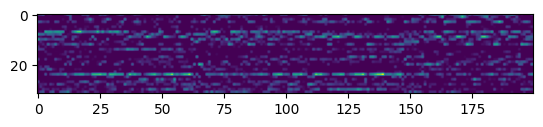

In [317]:
# Let's check the probability assignments: 
plt.imshow(pmap[:,:200])

print(pmap[:,0])



<Axes: xlabel='mean prob dentate', ylabel='parcel'>

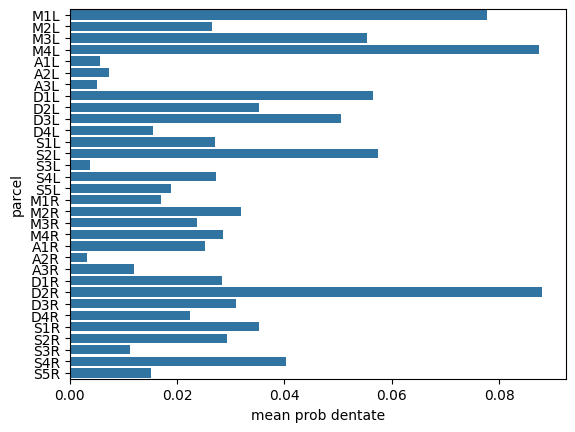

In [355]:
#average probability for each parcel 

p = pmap.mean(axis=1) #mean parcel allocation value of each voxel 
D=pd.DataFrame({'parcel':roi_names[1:],'mean prob dentate':p})
sb.barplot(y='parcel',x='mean prob dentate',data=D)


<Axes: xlabel='mean prob cereb grey', ylabel='parcel'>

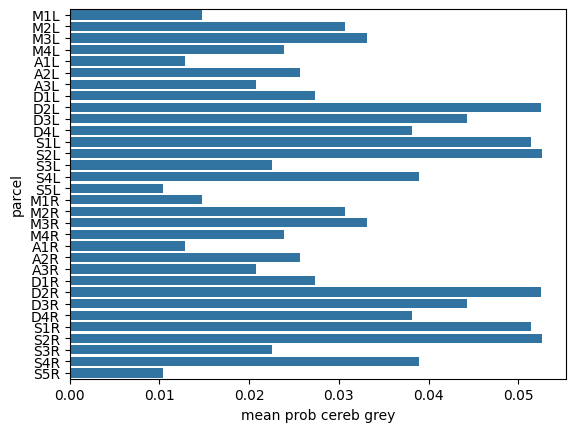

In [356]:
#average probability for each parcel cerebellum grey

p2 = pmap_cereb.mean(axis=1) #mean parcel allocation value of each voxel 
D2=pd.DataFrame({'parcel':roi_names[1:],'mean prob cereb grey':p2})
sb.barplot(y='parcel',x='mean prob cereb grey',data=D2)

(32,)
maximum prob value per parcel: [0.483066   0.38530204 0.4475418  0.46033737 0.23521426 0.23800565
 0.21368681 0.44970614 0.44541806 0.48950815 0.24296382 0.32611948
 0.4029063  0.20484133 0.27004382 0.2209685  0.36607167 0.38286468
 0.3129321  0.26907086 0.34777847 0.14364874 0.2580244  0.4131652
 0.45141992 0.43664208 0.25011617 0.31256428 0.27341065 0.23636964
 0.42490637 0.24441873]
[9.8135851e-02 1.2121415e-01 1.9430281e-01 ... 5.2162934e-02 4.2949211e-02
 1.3696750e-06]


<Axes: xlabel='max prob dentate', ylabel='parcel'>

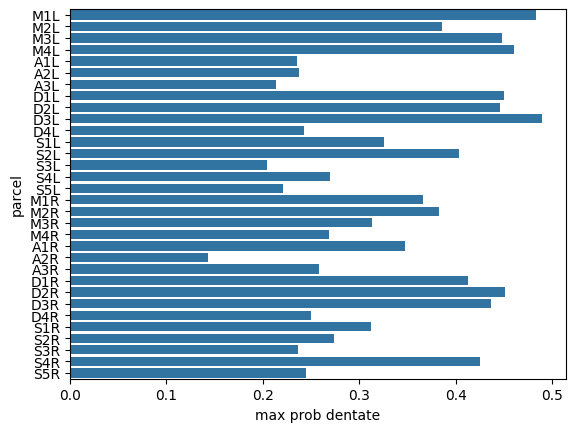

In [362]:
#maximum probability value associated with ech parcel 

wta = np.max(pmap, axis=1)

print(wta.shape)


print("maximum prob value per parcel:", wta)

print(pmap[0])

D=pd.DataFrame({'parcel':roi_names[1:],'max prob dentate':wta})
sb.barplot(y='parcel',x='max prob dentate',data=D)



(32,)
maximum prob value per parcel: [0.38451216 0.45013496 0.5163517  0.30445    0.26254988 0.36077213
 0.20771809 0.48409975 0.3848499  0.57401246 0.30889568 0.44113073
 0.43018603 0.37046027 0.36054212 0.27587506 0.3845121  0.45013487
 0.51635164 0.30444998 0.26254985 0.36077207 0.20771807 0.48409963
 0.38484985 0.5740124  0.30889562 0.44113064 0.430186   0.3704602
 0.36054206 0.27587503]
[9.8135851e-02 1.2121415e-01 1.9430281e-01 ... 5.2162934e-02 4.2949211e-02
 1.3696750e-06]


<Axes: xlabel='max prob cereb', ylabel='parcel'>

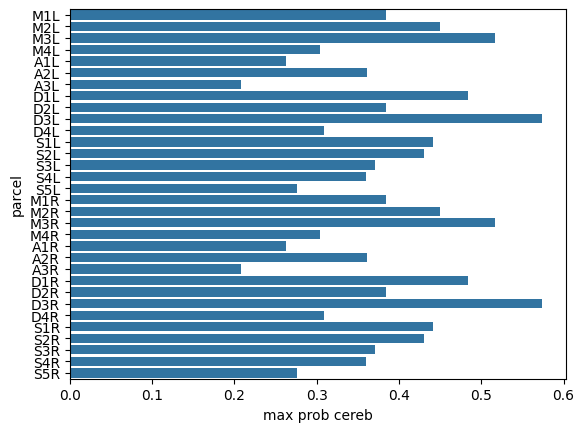

In [363]:
#maximum probability value associated with ech parcel 

wta = np.max(pmap_cereb, axis=1)

print(wta.shape)


print("maximum prob value per parcel:", wta)

print(pmap[0])

D=pd.DataFrame({'parcel':roi_names[1:],'max prob cereb':wta})
sb.barplot(y='parcel',x='max prob cereb',data=D)



[1.21214151e-01 2.11168300e-15 3.93830464e-21 1.17507331e-01
 6.43749682e-30 5.82940161e-43 4.83229689e-12 1.40962033e-02
 1.58831805e-01 2.12627780e-02 1.09108627e-01 5.17258979e-02
 1.26552377e-02 7.04169215e-04 7.90287927e-02 4.76307209e-23
 1.30411901e-03 1.97463483e-25 2.90589412e-15 6.92727311e-22
 1.40836909e-09 4.42599431e-02 7.11785704e-02 4.61253553e-14
 8.02437405e-09 1.19284005e-08 7.18423721e-08 4.36319255e-07
 4.16516028e-02 5.94678819e-02 1.45807868e-16 9.60024595e-02]
[305.675    104.530396 217.99753  343.7168    22.315668  28.942608
  20.258253 222.06769  138.86801  198.62796   60.913177 106.718445
 226.21078   14.854448 107.3177    74.368774  66.73534  125.22891
  93.295494 112.23165   99.09483   12.71618   47.0691   111.34023
 346.28198  122.11883   88.146416 138.92294  114.89909   44.228874
 158.6293    59.677574]


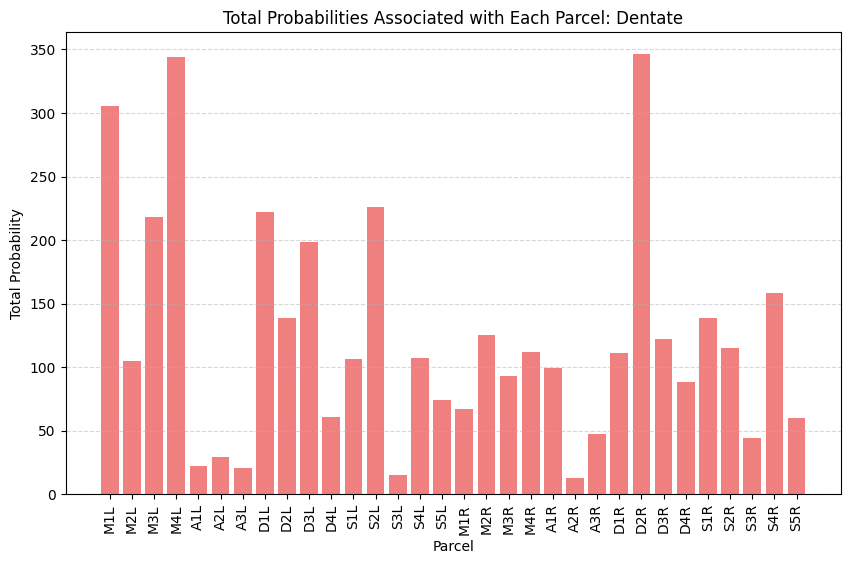

In [326]:
#total probabilities associated with each parcel 

import numpy as np

print(pmap[:,1])

# Sum probabilities across all voxels for each parcel
total_probabilities = np.sum(pmap, axis=1)

print(total_probabilities)

# Print or visualize the results
#for i, prob in enumerate(total_probabilities):
   # print(f"Parcel {roi_names[i+1]}: Total Probability = {prob}")

# Optionally, plot the total probabilities
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(roi_names[1:34], total_probabilities, color='lightcoral')
plt.xlabel("Parcel")
plt.ylabel("Total Probability")
plt.title("Total Probabilities Associated with Each Parcel: Dentate")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


[9.9999982e-09 9.1401655e-03 5.1676627e-02 4.1665334e-02 9.9999982e-09
 9.0600457e-03 2.1331728e-02 9.9999982e-09 1.5290152e-01 9.9999982e-09
 6.7095779e-02 1.5256611e-01 1.5276045e-01 7.5466044e-02 2.5654319e-01
 9.7929342e-03 9.9999982e-09 9.9999982e-09 9.9999982e-09 9.9999982e-09
 9.9999982e-09 9.9999982e-09 9.9999982e-09 9.9999982e-09 9.9999982e-09
 9.9999982e-09 9.9999982e-09 9.9999982e-09 9.9999982e-09 9.9999982e-09
 9.9999982e-09 9.9999982e-09]
[269.09402 560.54114 606.94073 436.38184 234.14777 469.86383 380.39404
 500.12378 961.0235  810.7889  697.1397  940.56287 963.1571  412.50397
 711.4999  190.8384  269.09396 560.541   606.9407  436.38174 234.1477
 469.86377 380.39404 500.12372 961.02325 810.7888  697.1396  940.5627
 963.1569  412.50385 711.4999  190.83836]


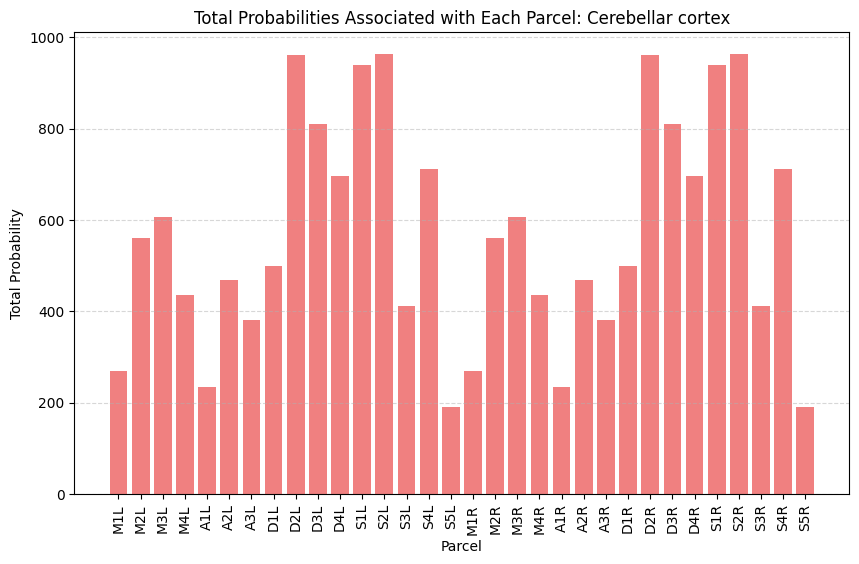

In [327]:
#total probabilities associated with each parcel 

import numpy as np

print(pmap_cereb[:,1])

# Sum probabilities across all voxels for each parcel
total_probabilities = np.sum(pmap_cereb, axis=1)

print(total_probabilities)

# Print or visualize the results
#for i, prob in enumerate(total_probabilities):
   # print(f"Parcel {roi_names[i+1]}: Total Probability = {prob}")

# Optionally, plot the total probabilities
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(roi_names[1:34], total_probabilities, color='lightcoral')
plt.xlabel("Parcel")
plt.ylabel("Total Probability")
plt.title("Total Probabilities Associated with Each Parcel: Cerebellar cortex")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


[532 101 225 464   8   5   4 276 137 287  15  78 230   1  23  18  53 109
  73  45  78   0  17 148 537 138  30  71  46  10 162  13]


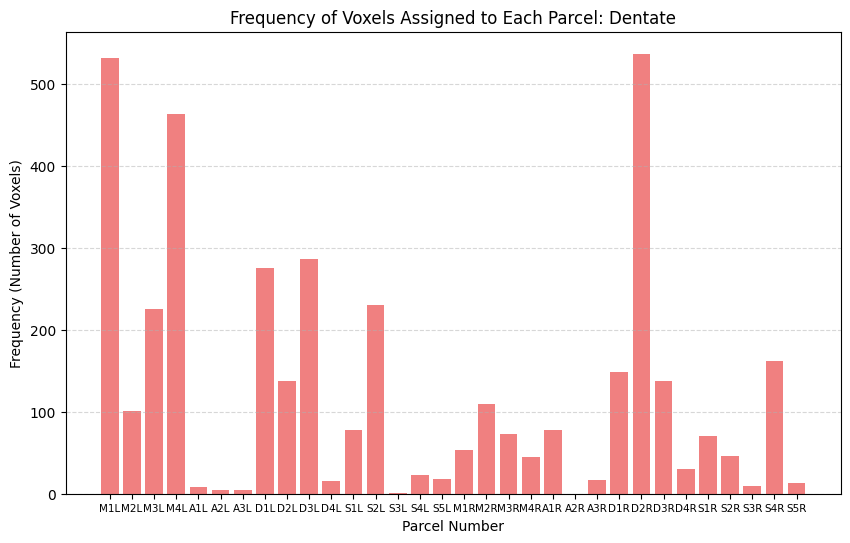

13.523131672597867
2.567361464158617
5.719369598373157
11.794611082867311
0.20335536349771224
0.12709710218607015
0.10167768174885612
7.015760040671072
3.4824605998983222
7.295373665480427
0.3812913065582105
1.9827147941026944
5.846466700559228
0.02541942043721403
0.5846466700559227
0.45754956786985257
1.3472292831723438
2.7707168276563294
1.8556176919166243
1.1438739196746313
1.9827147941026944
0.0
0.4321301474326385
3.7620742247076766
13.650228774783935
3.507880020335536
0.762582613116421
1.8047788510421965
1.1692933401118455
0.2541942043721403
4.117946110828673
0.33045246568378245


In [341]:
wta = np.argmax(pmap, axis=0) 

wta +=1

# Count the frequency of each parcel (parcel numbers range from 0 to 31)
frequencies = np.bincount(wta, minlength=33)[1:]  # Ensure length is 32 even if some parcels don't appear

print(frequencies)


parcel_numbers = np.arange(1, 33)  # Parcel numbers from 1 to 32

plt.figure(figsize=(10, 6))
plt.bar(parcel_numbers, frequencies, color='lightcoral')
plt.xlabel("Parcel Number")
plt.ylabel("Frequency (Number of Voxels)")
plt.title("Frequency of Voxels Assigned to Each Parcel: Dentate")
plt.xticks(parcel_numbers, roi_names[1:], fontsize=7.5)  # Ensure all parcel numbers are shown
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

for i in frequencies:
    percentage = i/np.sum(frequencies)*100
    print(percentage)

[ 224  852  911  419  129  341  127  513 1203 1396  245  864 1372   67
  552   85  161  708  911  418  129  341  127  508 1199 1323  244  856
 1364   66  550   85]


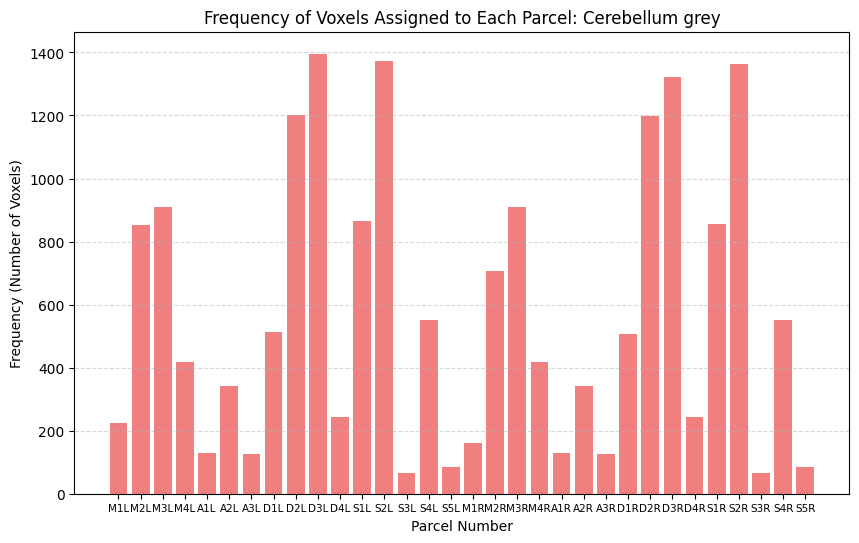

In [348]:
wta = np.argmax(pmap_cereb, axis=0) 

wta +=1


# Count the frequency of each parcel (parcel numbers range from 0 to 31)
frequencies = np.bincount(wta, minlength=33)[1:]  # Ensure length is 32 even if some parcels don't appear

print(frequencies)

parcel_numbers = np.arange(1, 33)  # Parcel numbers from 1 to 32

plt.figure(figsize=(10, 6))
plt.bar(parcel_numbers, frequencies, color='lightcoral')
plt.xlabel("Parcel Number")
plt.ylabel("Frequency (Number of Voxels)")
plt.title("Frequency of Voxels Assigned to Each Parcel: Cerebellum grey")
plt.xticks(parcel_numbers, roi_names[1:], fontsize=7.5)  # Ensure all parcel numbers are shown
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


[1.224712957900492, 4.658283214871514, 4.980863860032804, 2.2908693275013667, 0.7053034445051941, 1.864406779661017, 0.6943685073810826, 2.8048113723346093, 6.577364680153089, 7.632586112629852, 1.3395297977036633, 4.723892837616184, 7.501366867140515, 0.36632039365773644, 3.018042646254784, 0.4647348277747403, 0.8802624384909786, 3.870967741935484, 4.980863860032804, 2.285401858939311, 0.7053034445051941, 1.864406779661017, 0.6943685073810826, 2.7774740295243303, 6.555494805904866, 7.233460907599781, 1.3340623291416074, 4.680153089119737, 7.457627118644068, 0.36085292509568073, 3.0071077091306724, 0.4647348277747403]


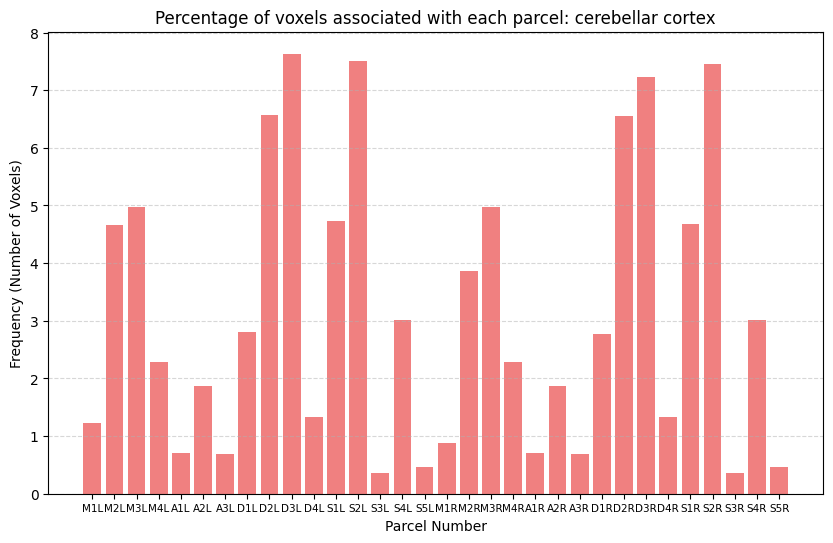

In [359]:
#gauging percentage of cerebellar cortex associated with each parcel  

wta = np.argmax(pmap_cereb, axis=0) 

wta +=1

# Count the frequency of each parcel (parcel numbers range from 0 to 31)
frequencies = np.bincount(wta, minlength=33)[1:]  # Ensure length is 32 even if some parcels don't appear

percentage = []
for i in frequencies:
    percentages = i/np.sum(frequencies)*100
    percentage.append(percentages)
   # print(percentage)

print(percentage)

parcel_numbers = np.arange(1, 33)  # Parcel numbers from 1 to 32

plt.figure(figsize=(10, 6))
plt.bar(parcel_numbers, percentage, color='lightcoral')
plt.xlabel("Parcel Number")
plt.ylabel("Frequency (Number of Voxels)")
plt.title("Percentage of voxels associated with each parcel: cerebellar cortex")
plt.xticks(parcel_numbers, roi_names[1:], fontsize=7.5)  # Ensure all parcel numbers are shown
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


[13.523131672597867, 2.567361464158617, 5.719369598373157, 11.794611082867311, 0.20335536349771224, 0.12709710218607015, 0.10167768174885612, 7.015760040671072, 3.4824605998983222, 7.295373665480427, 0.3812913065582105, 1.9827147941026944, 5.846466700559228, 0.02541942043721403, 0.5846466700559227, 0.45754956786985257, 1.3472292831723438, 2.7707168276563294, 1.8556176919166243, 1.1438739196746313, 1.9827147941026944, 0.0, 0.4321301474326385, 3.7620742247076766, 13.650228774783935, 3.507880020335536, 0.762582613116421, 1.8047788510421965, 1.1692933401118455, 0.2541942043721403, 4.117946110828673, 0.33045246568378245]


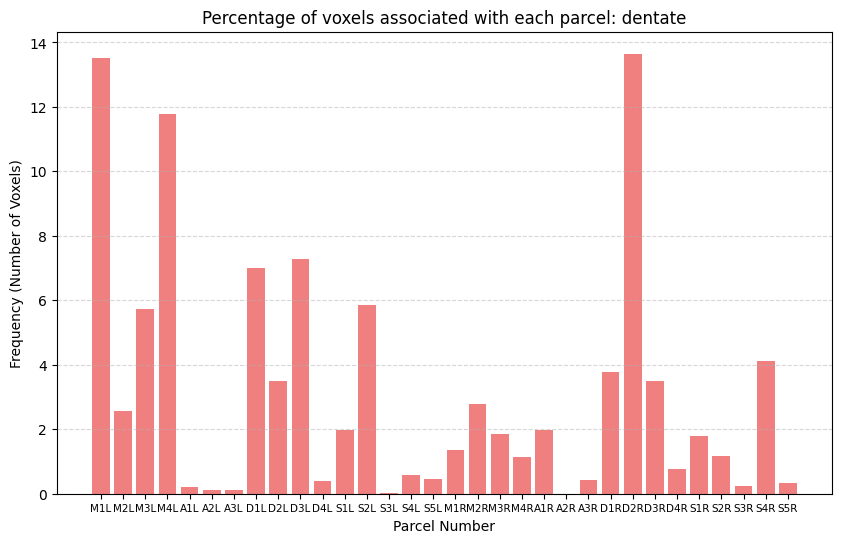

In [351]:
#gauging percentage of dentate associated with each parcel  

wta = np.argmax(pmap, axis=0) 

wta +=1

# Count the frequency of each parcel (parcel numbers range from 0 to 31)
frequencies = np.bincount(wta, minlength=33)[1:]  # Ensure length is 32 even if some parcels don't appear

percentage = []
for i in frequencies:
    percentages = i/np.sum(frequencies)*100
    percentage.append(percentages)
   # print(percentage)

print(percentage)

parcel_numbers = np.arange(1, 33)  # Parcel numbers from 1 to 32

plt.figure(figsize=(10, 6))
plt.bar(parcel_numbers, percentage, color='lightcoral')
plt.xlabel("Parcel Number")
plt.ylabel("Frequency (Number of Voxels)")
plt.title("Percentage of voxels associated with each parcel: dentate")
plt.xticks(parcel_numbers, roi_names[1:], fontsize=7.5)  # Ensure all parcel numbers are shown
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [360]:
# Initialize lists to store highest and lowest probabilities for each parcel
highest_probs = []
lowest_probs = []

# Iterate through each parcel number (1 to 32)
for parcel in parcel_numbers:
    # Find the indices of voxels that belong to the current parcel
    parcel_voxels = np.where(wta == parcel)[0]
    
    if len(parcel_voxels) > 0:  # Check if there are any voxels for this parcel
        # Extract the probabilities for these voxels
        parcel_probs = pmap_cereb[parcel-1, parcel_voxels]  # Subtract 1 from parcel to match indexing

        # Find the highest and lowest probabilities for the current parcel
        highest_probs.append(np.max(parcel_probs))
        lowest_probs.append(np.min(parcel_probs))
    else:
        # Handle the case where no voxels are assigned to this parcel
        highest_probs.append(np.nan)
        lowest_probs.append(np.nan)

# Display the highest and lowest probabilities for each parcel
for parcel, highest, lowest in zip(parcel_numbers, highest_probs, lowest_probs):
    if not np.isnan(highest) and not np.isnan(lowest):
        print(f"Parcel {parcel}: Highest prob = {highest:.4f}, Lowest prob = {lowest:.4f}")
    else:
        print(f"Parcel {parcel}: No voxels assigned")





Parcel 1: Highest prob = 0.3845, Lowest prob = 0.0787
Parcel 2: Highest prob = 0.4501, Lowest prob = 0.0657
Parcel 3: Highest prob = 0.5164, Lowest prob = 0.1034
Parcel 4: Highest prob = 0.3045, Lowest prob = 0.0715
Parcel 5: Highest prob = 0.2625, Lowest prob = 0.1041
Parcel 6: Highest prob = 0.3608, Lowest prob = 0.0956
Parcel 7: Highest prob = 0.2077, Lowest prob = 0.1088
Parcel 8: Highest prob = 0.4841, Lowest prob = 0.0902
Parcel 9: Highest prob = 0.3848, Lowest prob = 0.0606
Parcel 10: Highest prob = 0.5740, Lowest prob = 0.0624
Parcel 11: Highest prob = 0.3089, Lowest prob = 0.0587
Parcel 12: Highest prob = 0.4411, Lowest prob = 0.0740
Parcel 13: Highest prob = 0.4302, Lowest prob = 0.0681
Parcel 14: Highest prob = 0.3705, Lowest prob = 0.0657
Parcel 15: Highest prob = 0.3605, Lowest prob = 0.0654
Parcel 16: Highest prob = 0.2759, Lowest prob = 0.1123
Parcel 17: Highest prob = 0.3845, Lowest prob = 0.1095
Parcel 18: Highest prob = 0.4501, Lowest prob = 0.1068
Parcel 19: Highest 

In [ ]:
wta = np.max(pmap, axis=1) 

print("maximum prob value per parcel:", wta)

print(pmap[0])

D=pd.DataFrame({'parcel':roi_names[1:],'prob':wta})
sb.barplot(y='parcel',x='prob',data=D)

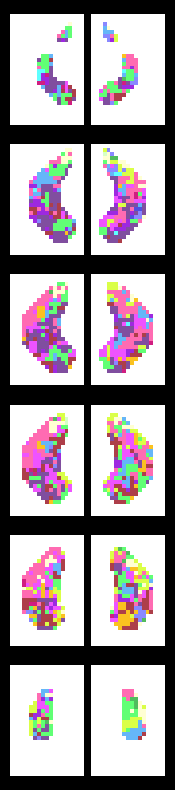

In [6]:
#wta = np.argmax(data,axis=0)
wta = np.argmax(pmap, axis=0) 
wta += 1 #to match correct labelling in colour scheme 

wta_int32 = wta.astype(np.int32)

dentate_parcellation = plot.plot_dentate(wta_int32,cscale=[0,32],cmap=cmap)

pass 

['M', 'A', 'D', 'S']


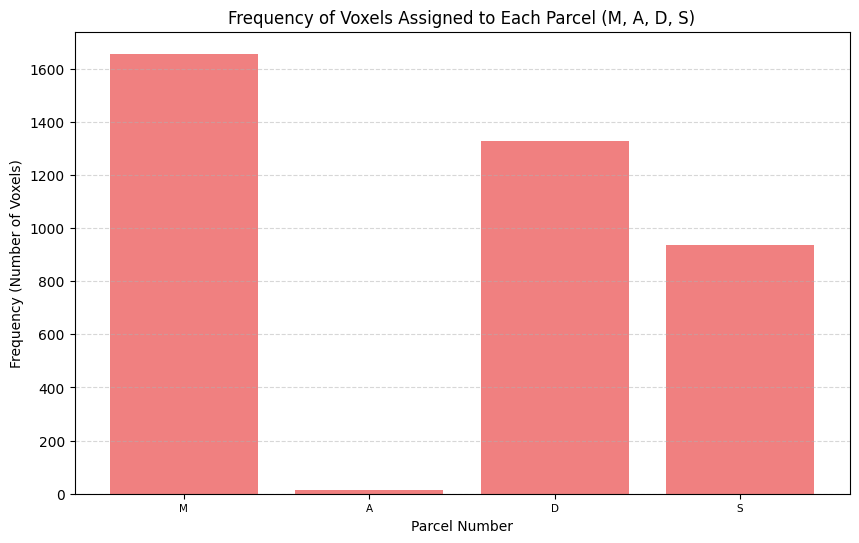

In [172]:
#5 regions amalgamation

new_labels = ['0','M','A','D','S'] # Use regexpress '..L','..R' for leftvs.right
index = ds.combine_parcel_labels(roi_names,new_labels)
index = index[1:]
new_reg = np.unique(index)
newprob = np.zeros((len(new_reg),pmap.shape[1]))
for i in range(len(new_reg)):
    newprob[i,:] = pmap[index==new_reg[i],:].sum(axis=0)


#number of voxels associated with each of four parcels 

wta = np.argmax(newprob, axis=0) 

wta +=1

print(new_labels[1:5])

# Count the frequency of each parcel (parcel numbers range from 0 to 31)
frequencies = np.bincount(wta, minlength=5)[1:]  # Ensure length is 32 even if some parcels don't appear

parcel_numbers = np.arange(1, 5)  # Parcel numbers from 1 to 32

plt.figure(figsize=(10, 6))
plt.bar(parcel_numbers, frequencies, color='lightcoral')
plt.xlabel("Parcel Number")
plt.ylabel("Frequency (Number of Voxels)")
plt.title("Frequency of Voxels Assigned to Each Parcel (M, A, D, S)")
plt.xticks(parcel_numbers, new_labels[1:5], fontsize=7.5)  # Ensure all parcel numbers are shown
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

 

In [119]:
#amalgamation 

new_labels = ['0', 'M.L', 'A.L', 
              'D1L', 'D2L', 'D3L', 'D4L', 'S1L', 'S2L', 'S3L', 'S4L', 'S5L', 
              'M1R', 'M2R', 'M3R', 'M4R', 'A1R', 'A2R', 'A3R', 'D1R', 'D2R', 'D3R', 'D4R', 
              'S1R', 'S2R', 'S3R', 'S4R', 'S5R']

index = ds.combine_parcel_labels(roi_names,new_labels)
index = index[1:]
new_reg = np.unique(index)
newprob = np.zeros((len(new_reg),pmap.shape[1]))
for i in range(len(new_reg)):
    newprob[i,:] = pmap[index==new_reg[i],:].sum(axis=0)


 

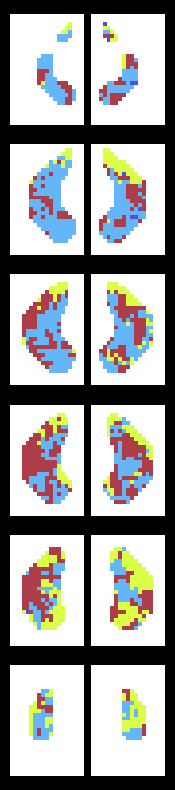

In [156]:
#new_cmap = cmap[[0,1,2,3,4,5,32],:] #the values here select a colour, so make sure that the colour is associated with the correct region

index2 = np.concatenate([np.arange(0, 2), [5], np.arange(9, 33)])

new_cmap = cmap[[0,3,6,8,13],:]

#0, M (3: blue), A (6: dark blue), D (8: maroon), S (13: yellow)

wta = np.argmax(newprob, axis=0) 
wta += 1

wta_int32 = wta.astype(np.int32)

dentate_parcellation = plot.plot_dentate(wta_int32,cscale=[0,5],cmap=new_cmap)


(array([1131.,    0.,    0.,   23.,    0.,    0.,  909.,    0.,    0.,
        1871.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

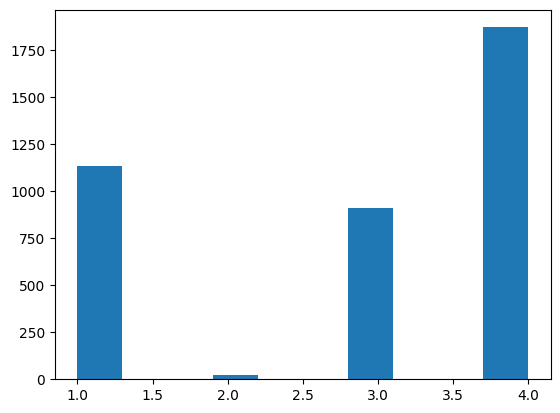

In [41]:
plt.hist(wta.flatten())